In [2]:
!pip install -U scikit-learn
!pip install umap-learn
!pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import os
import numpy as np
from feature_engine.encoding import OneHotEncoder
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv(os.path.join('shared_documents','merged_transformed_split_financial_preference_into_cols.csv'),
                  sep=',')

In [28]:
data = data.drop_duplicates('Opportunity ID')
data.columns[-30:]

Index(['Last Modified On', 'Apprenticeship tax', 'Sponsorship', 'Gala Lyon',
       'JDLV Ceremony', 'Public Newsletter', 'Annual report',
       'But en Or Paris', 'Gala Paris', 'But en Or Lyon', 'Olympics',
       'But en Or Lille', 'Gala Lille', 'Jogg dans la ville',
       'Tournament de Paris', 'Center inauguration', 'Tournament CVC',
       'But en Or Marseille', 'Gala Londres', 'Gala New York',
       'Entrepreuneur dans la Ville', 'Greetings', 'Gala Marseille',
       'Call for Donations', 'But en Or St Etienne', 'Campus',
       'Gala St Etienne', 'But en Or Londres', 'Gala Grenoble',
       'But en Or Grenoble'],
      dtype='object')

In [5]:
#data = data[(data['Status']!='Open')&(data['Status']!='New')]

In [6]:
features = [
    'Estimated amount',
    'Amount received',
    'Class ID',
    'Agreement',
    'Type de contrat',
    'Zone SDLV',
    'Partner type',
    'Funded Program',
]

In [7]:
for column in data.columns:
    print(column, len(data[column].unique()))

Opportunity ID 5987
Line Nbr. 9
Inventory ID 65
Year 15
Unit Price 1264
Quantity 82
UOM 5
Ext. Price 1359
Currency 3
Discount Amount 35
Discount, % 13
Funded Program 8
Free Item 3
Tax Category_x 5
Business Account 2064
Contact ID 1728
Estimated Close Date 740
Status 5
Stage 7
Probability 34
Estimated amount 1511
Amount received 946
Difference 852
Owner Name_x 39
Follow-up with_x 28
Class ID 10
Class_x 10
Source 3
Source Campaign 26
Campaign Name 26
Programme financé 28
Action financée 17
Agreement 3
Signature date of the agreement 184
Agreement expiry date 66
Duration of agreement (months) 51
Deadline for submission of interim report 21
Final report deadline 42
Type de contrat 6
Type de financement 3
Zone SDLV 19
Theorical payment date 1 108
Theorical payment amount 1 151
Theorical payment date 2 51
Theorical payment amount 2 69
Theorical payment date 3 33
Theorical payment amount 3 39
Theorical payment date 4 13
Theorical payment amount 4 15
Theorical payment date 5 8
Theorical paymen

In [8]:
data = data[features]

In [9]:
import pandas as pd
from typing import Dict

def percentage_of_nans(df: pd.DataFrame) -> Dict[str, float]:
    """
    Calculate the percentage of NaN values in each column of a DataFrame.

    Args:
        df: Pandas DataFrame.

    Returns:
        A dictionary where keys are the column names and values are the percentages of NaNs.
    """
    # Use isna() to find NaN values and mean() to find the proportion, multiply by 100 for percentage
    nan_percentage = df.isna().mean().round(4) * 100

    # Convert to dictionary
    nan_percentage_dict = nan_percentage.to_dict()

    return nan_percentage_dict

In [10]:
percentage_of_nans(data)

{'Estimated amount': 0.02,
 'Amount received': 54.300000000000004,
 'Class ID': 0.02,
 'Agreement': 35.089999999999996,
 'Type de contrat': 95.92,
 'Zone SDLV': 50.339999999999996,
 'Partner type': 12.33,
 'Funded Program': 30.220000000000002}

In [11]:
import pandas as pd
from typing import Union

def fill_na_in_column(df: pd.DataFrame, column: str, value: Union[int, float, str]) -> pd.DataFrame:
    """
    Fill NaN values in a specific column of a DataFrame with a given value.

    Args:
        df: The input Pandas DataFrame.
        column: The name of the column where NaN values should be filled.
        value: The value to fill NaN values with.

    Returns:
        A new DataFrame with NaN values in the specified column filled with the given value.

    Raises:
        KeyError: Raises an exception if the specified column does not exist in the DataFrame.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise KeyError(f"The column '{column}' does not exist in the DataFrame.")

    # Use fillna() to replace NaN values in the specified column with the provided value
    df_filled = df.copy()
    df_filled[column] = df_filled[column].fillna(value)

    # Return the DataFrame with NaN values filled
    return df_filled

In [12]:
data = fill_na_in_column(data,'Amount received',1)
#data = fill_na_in_column(data,'Owner Name_x','Missing')
#data = fill_na_in_column(data,'Follow-up with','Missing')
data = fill_na_in_column(data,'Class ID','Missing')
#data = fill_na_in_column(data,'Campaign Name','Missing')
data = fill_na_in_column(data,'Agreement','Missing')
data = fill_na_in_column(data,'Type de contrat','Missing')
data = fill_na_in_column(data,'Zone SDLV','Missing')
#data = fill_na_in_column(data,'Activity sector','Missing')
data = fill_na_in_column(data,'Funded Program','Missing')
data = fill_na_in_column(data,'Estimated amount',1)
data = fill_na_in_column(data,'Partner type','Missing')


In [13]:
data['Amount received'] = np.log10(1+np.abs(data['Amount received']))
data['Estimated amount'] = np.log10(1+np.abs(data['Estimated amount']))

In [14]:
percentage_of_nans(data)

{'Estimated amount': 0.0,
 'Amount received': 0.0,
 'Class ID': 0.0,
 'Agreement': 0.0,
 'Type de contrat': 0.0,
 'Zone SDLV': 0.0,
 'Partner type': 0.0,
 'Funded Program': 0.0}

In [15]:
ohe = OneHotEncoder()
ohe.fit(data)
data = ohe.transform(data)
data

,Estimated amount,Amount received,Class ID_PPRIV EVNT,Class ID_PPRIV MEC,Class ID_CAMP SAL,Class ID_CAMP TER,Class ID_PPUB,Class ID_CAMP EVT,Class ID_PPRIV DONN,Class ID_PPRIV MCOM,...,Partner type_Prospect,Partner type_Inactive prospect,Funded Program_Non specified,Funded Program_Missing,Funded Program_Sport,Funded Program_Job dans la Ville,Funded Program_Séjours et Camps,Funded Program_Entrepreneurs dans la Ville,Funded Program_Réussite dans la Ville,Funded Program_L dans la Ville
0,3.954291,0.301030,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.954291,0.301030,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,2.149219,0.301030,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15,2.545307,0.301030,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16,2.082785,0.301030,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38200,3.875119,3.875119,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
38205,4.544080,0.301030,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
38210,4.301052,0.301030,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38212,4.000043,0.301030,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from typing import Union

In [17]:
# Initialize the StandardScaler from scikit-learn
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Normalize each numerical column using Gaussian normalization
data[num_cols] = scaler.fit_transform(data[num_cols])


In [18]:
data

,Estimated amount,Amount received,Class ID_PPRIV EVNT,Class ID_PPRIV MEC,Class ID_CAMP SAL,Class ID_CAMP TER,Class ID_PPUB,Class ID_CAMP EVT,Class ID_PPRIV DONN,Class ID_PPRIV MCOM,...,Partner type_Prospect,Partner type_Inactive prospect,Funded Program_Non specified,Funded Program_Missing,Funded Program_Sport,Funded Program_Job dans la Ville,Funded Program_Séjours et Camps,Funded Program_Entrepreneurs dans la Ville,Funded Program_Réussite dans la Ville,Funded Program_L dans la Ville
0,0.573787,-0.854071,1.945706,-0.853433,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
1,0.573787,-0.854071,1.945706,-0.853433,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
14,-1.192516,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
15,-0.804935,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
16,-1.257523,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38200,0.496316,1.280206,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,1.068662,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,-0.077778,-0.109551
38205,1.150910,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,-0.935749,-0.658014,-0.151885,2.352876,-0.144227,-0.132307,-0.077778,-0.109551
38210,0.913101,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,-0.935749,-0.658014,-0.151885,-0.425012,6.933525,-0.132307,-0.077778,-0.109551
38212,0.618557,-0.854071,-0.513952,1.171737,-0.216052,-0.183972,-0.276426,-0.169915,-0.068548,-0.040903,...,-0.163026,-0.031673,-0.935749,-0.658014,-0.151885,-0.425012,-0.144227,-0.132307,12.857121,-0.109551


In [19]:
import umap
reducer = umap.UMAP(n_components=20)

In [20]:
embedding = reducer.fit_transform(data)

In [21]:
embedding

array([[ 4.7448463 ,  5.696689  , 11.505362  , ...,  8.272361  ,
         5.4556403 ,  4.663207  ],
       [ 4.7715235 ,  5.6758323 , 11.49253   , ...,  8.272233  ,
         5.4309106 ,  4.6733246 ],
       [ 0.24533395,  7.741525  ,  7.9038863 , ...,  4.153228  ,
         7.835205  , -1.6544642 ],
       ...,
       [ 1.4308546 ,  2.0083869 ,  2.9386635 , ...,  4.2274227 ,
         3.2551622 , -1.791678  ],
       [ 3.1718786 ,  7.0734315 ,  5.6447544 , ...,  7.632597  ,
         8.006939  , -0.8559354 ],
       [ 2.8848712 ,  2.652724  ,  1.9902966 , ...,  7.6104884 ,
         1.8967044 , -2.1714494 ]], dtype=float32)

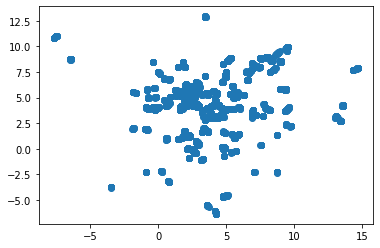

In [22]:
plt.scatter(embedding[:,:2][:,0],embedding[:,:2][:,1])

In [285]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from typing import Any

def plot_elbow_curve(embedding: np.ndarray) -> None:
    """
    Plot the Elbow Curve to determine the optimal number of clusters.
    
    Args:
        embedding: The input data for clustering, typically a NumPy ndarray.
        
    Returns:
        None. A plot is displayed showing the Elbow Curve.
    """
    # Initialize an empty list to store the inertia values for each number of clusters
    inertias = []
    
    # Run KMeans clustering for n_clusters ranging from 2 to 10
    for n in range(2, 200):
        # Create a KMeans instance with the current number of clusters
        kmeans = KMeans(n_clusters=n, random_state=42)
        
        # Fit the model to the data
        kmeans.fit(embedding)
        
        # Store the inertia value for this number of clusters
        inertias.append(kmeans.inertia_)
        
    # Plot the Elbow Curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 200), inertias, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()



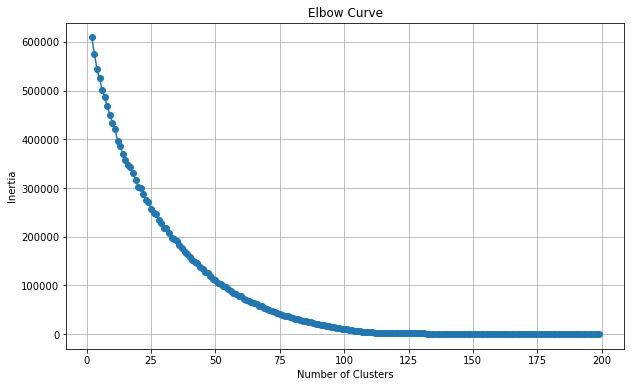

In [286]:
plot_elbow_curve(embedding)

In [22]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=100,
                random_state=42)
kmeans.fit(embedding)
clusters = kmeans.predict(embedding)

In [23]:
for cluster in range(100):
    samples  = data[clusters==cluster]
    

In [290]:
clusters==0

array([False, False,  True, ..., False,  True, False])

In [301]:
samples  = data[clusters==0]

In [304]:
r = (data['Estimated amount']-data['Amount received'])/(data['Estimated amount'])

In [1]:
print(r)

NameError: name 'r' is not defined

In [29]:
data['Cluster'] = clusters

In [30]:
data = fill_na_in_column(data,'Amount received',1)
data = fill_na_in_column(data,'Estimated amount',1)

In [96]:
mean_prob = (data['Status']=='Won').sum()/len((data['Status']!='Open')&(data['Status']!='New'))

In [104]:
desired_data = data[(data['Status']=='Won')|(data['Status']=='Lost')]
mean_converted_rate = (((desired_data['Estimated amount']-desired_data['Amount received'])/(1+desired_data['Estimated amount'])).dropna()).mean()
print(mean_converted_rate)

-7.762420010419052


In [31]:
idx2prob = {}
idx2converted_rate={}
for i in range(100):
    cluster_data = data[(data['Cluster']==i)&(data['Estimated amount']<np.quantile(data['Estimated amount'],0.99))&(data['Amount received']<np.quantile(data['Amount received'],0.99))]
    desired_data = cluster_data[(cluster_data['Status']!='Open')&(cluster_data['Status']!='New')]
    converted_rate = ((desired_data['Estimated amount']-desired_data['Amount received'])/(1+desired_data['Estimated amount'])).mean()
    prob = (cluster_data['Status']=='Won').sum()/len((cluster_data['Status']!='Open')&(cluster_data['Status']!='New'))
    for index in cluster_data.index:
        if len(cluster_data)<5:
            idx2prob[index]=mean_prob
            idx2converted_rate[index]=mean_converted_rate
        else:
            idx2prob[index]=prob
            idx2converted_rate[index]=converted_rate           
        

In [122]:
idx2converted_rate

{167: 0.10524842227357221,
 614: 0.10524842227357221,
 622: 0.10524842227357221,
 630: 0.10524842227357221,
 2402: 0.10524842227357221,
 4533: 0.10524842227357221,
 5000: 0.10524842227357221,
 5589: 0.10524842227357221,
 5704: 0.10524842227357221,
 5712: 0.10524842227357221,
 5802: 0.10524842227357221,
 5862: 0.10524842227357221,
 5936: 0.10524842227357221,
 6050: 0.10524842227357221,
 6074: 0.10524842227357221,
 6110: 0.10524842227357221,
 6113: 0.10524842227357221,
 6158: 0.10524842227357221,
 6172: 0.10524842227357221,
 6245: 0.10524842227357221,
 6345: 0.10524842227357221,
 6405: 0.10524842227357221,
 6502: 0.10524842227357221,
 6704: 0.10524842227357221,
 6859: 0.10524842227357221,
 7224: 0.10524842227357221,
 7232: 0.10524842227357221,
 7544: 0.10524842227357221,
 8329: 0.10524842227357221,
 8337: 0.10524842227357221,
 9912: 0.10524842227357221,
 14906: 0.10524842227357221,
 17226: 0.10524842227357221,
 18328: 0.10524842227357221,
 18779: 0.10524842227357221,
 19376: 0.1052484222

In [91]:
idx2prob = {}
for i in range(100):
    cluster_data = data[data['Cluster']==i]
    prob = (cluster_data['Status']=='Won').sum()/len((cluster_data['Status']!='Open')&(cluster_data['Status']!='New'))
    print(prob)

0.49206349206349204
1.0
0.7474747474747475
1.0
0.5751789976133651
0.9585492227979274
0.14285714285714285
0.6071428571428571
0.060240963855421686
0.9207920792079208
0.13286713286713286
0.21875
1.0
0.44554455445544555
0.6785714285714286
0.8409090909090909
0.06818181818181818
1.0
1.0
0.9929577464788732
0.9358974358974359
0.05
1.0
1.0
0.45625
1.0
1.0
0.9807692307692307
0.9878048780487805
1.0
0.971830985915493
1.0
0.04
1.0
0.42028985507246375
1.0
1.0
0.6285714285714286
0.24561403508771928
1.0
0.02564102564102564
0.5483870967741935
1.0
0.1935483870967742
0.36666666666666664
0.21428571428571427
1.0
0.7027027027027027
0.8688524590163934
0.9418604651162791
0.8918918918918919
0.8
1.0
1.0
0.9347826086956522
0.8548387096774194
0.14285714285714285
0.0
0.2564102564102564
0.7241379310344828
0.03571428571428571
1.0
0.13333333333333333
0.961038961038961
0.9772727272727273
0.55
0.09523809523809523
1.0
0.16129032258064516
0.631578947368421
0.9125
1.0
0.975609756097561
0.847457627118644
1.0
1.0
1.0
1.0
1.

In [32]:
all_data = pd.read_csv(os.path.join('shared_documents','merged_transformed_split_financial_preference_into_cols.csv'),
                  sep=',')
#all_data = data.drop_duplicates('Opportunity ID')
all_data.columns[-30:]

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12,27,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,82,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Last Modified On', 'Apprenticeship tax', 'Sponsorship', 'Gala Lyon',
       'JDLV Ceremony', 'Public Newsletter', 'Annual report',
       'But en Or Paris', 'Gala Paris', 'But en Or Lyon', 'Olympics',
       'But en Or Lille', 'Gala Lille', 'Jogg dans la ville',
       'Tournament de Paris', 'Center inauguration', 'Tournament CVC',
       'But en Or Marseille', 'Gala Londres', 'Gala New York',
       'Entrepreuneur dans la Ville', 'Greetings', 'Gala Marseille',
       'Call for Donations', 'But en Or St Etienne', 'Campus',
       'Gala St Etienne', 'But en Or Londres', 'Gala Grenoble',
       'But en Or Grenoble'],
      dtype='object')

In [33]:
data

,Opportunity ID,Line Nbr.,Inventory ID,Year,Unit Price,Quantity,UOM,Ext. Price,Currency,Discount Amount,...,Greetings,Gala Marseille,Call for Donations,But en Or St Etienne,Campus,Gala St Etienne,But en Or Londres,Gala Grenoble,But en Or Grenoble,Cluster
0,6387.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,54
1,6386.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,54
14,6385.0,1.0,DONPAR,2023.0,140.0,1.0,PIECE,140.0,EUR,0.0,...,0,0,1,0,0,0,0,0,0,18
15,6384.0,1.0,DONPAR,2023.0,350.0,1.0,PIECE,350.0,EUR,0.0,...,0,0,1,0,0,0,0,0,0,18
16,6383.0,1.0,DONPAR,2023.0,120.0,1.0,PIECE,120.0,EUR,0.0,...,0,0,1,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38200,4.0,1.0,MECENAT,2020.0,10625.0,1.0,PIECE,7500.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,47
38205,3.0,1.0,MECENAT,2020.0,35000.0,1.0,PIECE,35000.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,51
38210,2.0,1.0,MECENAT,2020.0,20000.0,1.0,PIECE,20000.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,2
38212,1.0,1.0,MECENAT,2020.0,10000.0,1.0,PIECE,10000.0,EUR,0.0,...,0,0,0,0,0,0,0,0,0,4


In [34]:
lst_prob = []
lst_converted_rate = []
outliers = []

for index in data.index:
    if index in idx2prob:    
        lst_prob.append(idx2prob[index])
        lst_converted_rate.append(idx2converted_rate[index])
        outliers.append(0)
    else:
        lst_prob.append(-1)
        lst_converted_rate.append(-1)
        outliers.append(1)

In [35]:
sum(outliers)

95

In [36]:
data['PROBS'] = lst_prob
data['CR'] = lst_converted_rate
data['OUTLIERS'] = outliers

In [37]:
data

,Opportunity ID,Line Nbr.,Inventory ID,Year,Unit Price,Quantity,UOM,Ext. Price,Currency,Discount Amount,...,But en Or St Etienne,Campus,Gala St Etienne,But en Or Londres,Gala Grenoble,But en Or Grenoble,Cluster,PROBS,CR,OUTLIERS
0,6387.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,54,0.068182,0.999810,0
1,6386.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,54,0.068182,0.999810,0
14,6385.0,1.0,DONPAR,2023.0,140.0,1.0,PIECE,140.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
15,6384.0,1.0,DONPAR,2023.0,350.0,1.0,PIECE,350.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
16,6383.0,1.0,DONPAR,2023.0,120.0,1.0,PIECE,120.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38200,4.0,1.0,MECENAT,2020.0,10625.0,1.0,PIECE,7500.0,EUR,0.0,...,0,0,0,0,0,0,47,0.551724,0.082220,0
38205,3.0,1.0,MECENAT,2020.0,35000.0,1.0,PIECE,35000.0,EUR,0.0,...,0,0,0,0,0,0,51,0.668394,0.485327,0
38210,2.0,1.0,MECENAT,2020.0,20000.0,1.0,PIECE,20000.0,EUR,0.0,...,0,0,0,0,0,0,2,0.741176,0.139376,0
38212,1.0,1.0,MECENAT,2020.0,10000.0,1.0,PIECE,10000.0,EUR,0.0,...,0,0,0,0,0,0,4,0.510460,-140.555479,0


In [38]:
op_ids = []
for index in data.index:
    op_ids.append(all_data.loc[index]['Opportunity ID'])

In [39]:
data['Opportunity ID']=op_ids

In [41]:
data.to_csv(os.path.join('shared_documents','clean_data_updated.csv'),index=False)

In [1]:
data

NameError: name 'data' is not defined